<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_2_4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/multiplication_pattern/multiplication_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.4_n20.csv',
 'data_multi_delta_-2.4_n30.csv',
 'data_multi_delta_-2.4_n60.csv',
 'data_multi_delta_-2.4_n120.csv',
 'data_multi_delta_-2.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,20.358430,68.453944,73.160773,-2.184650e-05,171.973125,171.973169,-4.345832e-05
1,0.0,1.0,45.452839,82.990009,91.735847,4.828368e-06,230.178699,230.178710,-1.049962e-05
2,0.0,2.0,32.023298,48.376515,31.510017,-3.916006e-05,121.909790,121.909859,-6.829542e-05
3,0.0,3.0,51.600048,41.602642,58.356852,2.971032e-06,161.559545,161.559593,-4.852928e-05
4,0.0,4.0,81.855786,87.692149,56.676940,-2.499963e-05,236.224850,236.224874,-2.392129e-05
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,47.616670,57.168335,68.202796,-6.561934e-07,182.987801,182.987864,-6.324383e-05
19996,999.0,16.0,99.088411,42.450997,29.093799,-7.317306e-05,180.633133,180.633248,-1.152997e-04
19997,999.0,17.0,81.430306,99.838554,58.054514,-1.449679e-05,249.323360,249.323278,8.190628e-05
19998,999.0,18.0,86.129443,59.116680,42.138299,1.143500e-05,197.384433,197.384433,2.310608e-07


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,20.358430,68.453944,73.160773,-2.184650e-05,171.973125,171.973169,-4.345832e-05
1,0.0,1.0,45.452839,82.990009,91.735847,4.828368e-06,230.178699,230.178710,-1.049962e-05
2,0.0,2.0,32.023298,48.376515,31.510017,-3.916006e-05,121.909790,121.909859,-6.829542e-05
3,0.0,3.0,51.600048,41.602642,58.356852,2.971032e-06,161.559545,161.559593,-4.852928e-05
4,0.0,4.0,81.855786,87.692149,56.676940,-2.499963e-05,236.224850,236.224874,-2.392129e-05
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,47.616670,57.168335,68.202796,-6.561934e-07,182.987801,182.987864,-6.324383e-05
19996,999.0,16.0,99.088411,42.450997,29.093799,-7.317306e-05,180.633133,180.633248,-1.152997e-04
19997,999.0,17.0,81.430306,99.838554,58.054514,-1.449679e-05,249.323360,249.323278,8.190628e-05
19998,999.0,18.0,86.129443,59.116680,42.138299,1.143500e-05,197.384433,197.384433,2.310608e-07


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    20.358430  68.453944  ...  171.973169 -4.345832e-05
      1.0    45.452839  82.990009  ...  230.178710 -1.049962e-05
      2.0    32.023298  48.376515  ...  121.909859 -6.829542e-05
      3.0    51.600048  41.602642  ...  161.559593 -4.852928e-05
      4.0    81.855786  87.692149  ...  236.224874 -2.392129e-05
...                ...        ...  ...         ...           ...
999.0 15.0   47.616670  57.168335  ...  182.987864 -6.324383e-05
      16.0   99.088411  42.450997  ...  180.633248 -1.152997e-04
      17.0   81.430306  99.838554  ...  249.323278  8.190628e-05
      18.0   86.129443  59.116680  ...  197.384433  2.310608e-07
      19.0   29.430035  98.504411  ...  159.329766  7.385282e-06

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    20.358430  68.453944  ...  171.973169 -4.345832e-05
      1.0    45.452839  82.990009  ...  230.178710 -1.049962e-05
      2.0    32.023298  48.376515  ...  121.909859 -6.829542e-05
      3.0    51.600048  41.602642  ...  161.559593 -4.852928e-05
      4.0    81.855786  87.692149  ...  236.224874 -2.392129e-05
...                ...        ...  ...         ...           ...
999.0 15.0   47.616670  57.168335  ...  182.987864 -6.324383e-05
      16.0   99.088411  42.450997  ...  180.633248 -1.152997e-04
      17.0   81.430306  99.838554  ...  249.323278  8.190628e-05
      18.0   86.129443  59.116680  ...  197.384433  2.310608e-07
      19.0   29.430035  98.504411  ...  159.329766  7.385282e-06

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,20.358430,68.453944,73.160773,-2.184650e-05,171.973125,171.973169,-4.345832e-05
1,0.0,1.0,45.452839,82.990009,91.735847,4.828368e-06,230.178699,230.178710,-1.049962e-05
2,0.0,2.0,32.023298,48.376515,31.510017,-3.916006e-05,121.909790,121.909859,-6.829542e-05
3,0.0,3.0,51.600048,41.602642,58.356852,2.971032e-06,161.559545,161.559593,-4.852928e-05
4,0.0,4.0,81.855786,87.692149,56.676940,-2.499963e-05,236.224850,236.224874,-2.392129e-05
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,47.616670,57.168335,68.202796,-6.561934e-07,182.987801,182.987864,-6.324383e-05
19996,999.0,16.0,99.088411,42.450997,29.093799,-7.317306e-05,180.633133,180.633248,-1.152997e-04
19997,999.0,17.0,81.430306,99.838554,58.054514,-1.449679e-05,249.323360,249.323278,8.190628e-05
19998,999.0,18.0,86.129443,59.116680,42.138299,1.143500e-05,197.384433,197.384433,2.310608e-07


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    20.358430  68.453944  ...  171.973169 -4.345832e-05
      1.0    45.452839  82.990009  ...  230.178710 -1.049962e-05
      2.0    32.023298  48.376515  ...  121.909859 -6.829542e-05
      3.0    51.600048  41.602642  ...  161.559593 -4.852928e-05
      4.0    81.855786  87.692149  ...  236.224874 -2.392129e-05
...                ...        ...  ...         ...           ...
999.0 15.0   47.616670  57.168335  ...  182.987864 -6.324383e-05
      16.0   99.088411  42.450997  ...  180.633248 -1.152997e-04
      17.0   81.430306  99.838554  ...  249.323278  8.190628e-05
      18.0   86.129443  59.116680  ...  197.384433  2.310608e-07
      19.0   29.430035  98.504411  ...  159.329766  7.385282e-06

[20000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

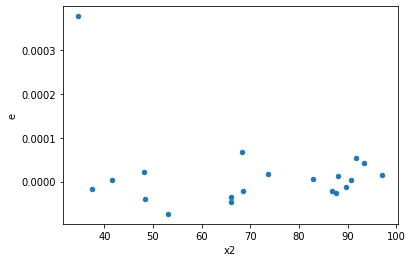

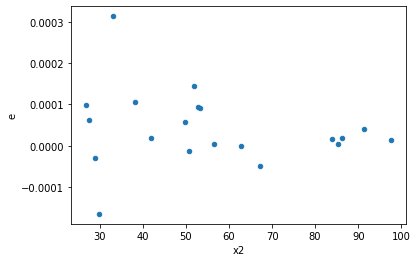

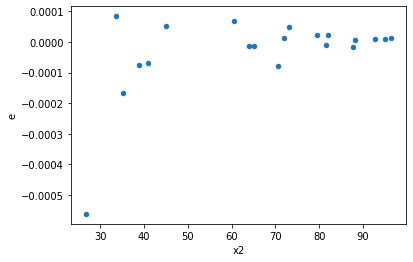

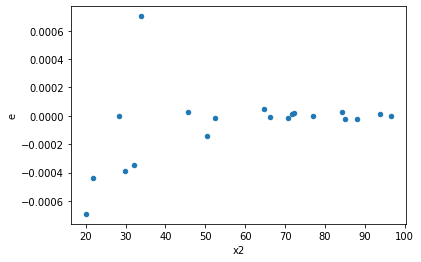

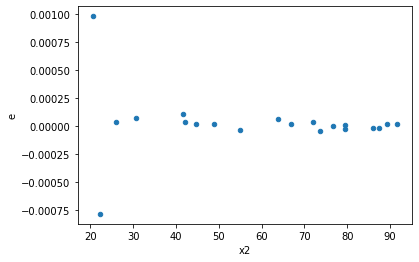

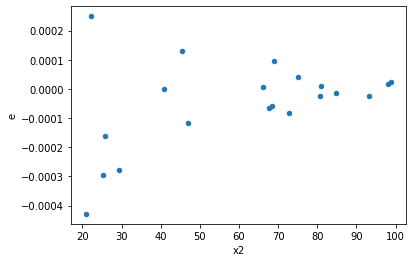

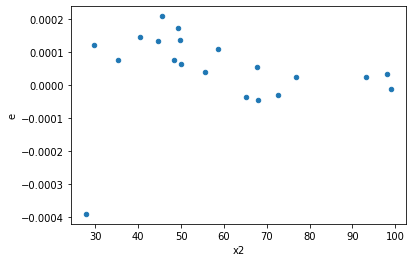

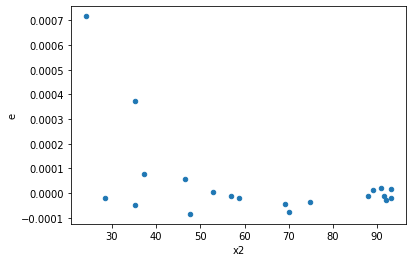

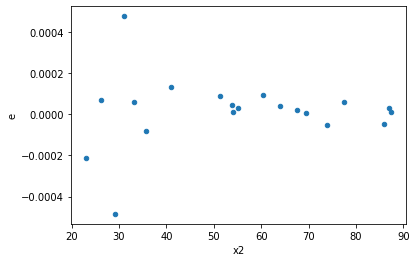

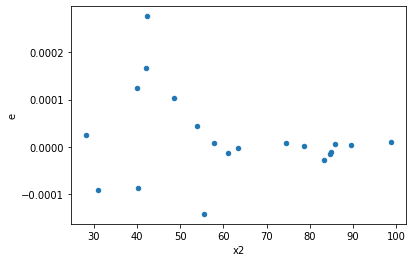

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
19.0,5.0,5.0,4.456118745017586e-09,3.6333339720901857e-09,1.1140296862543965e-09,9.083334930225464e-10,1.2264544848471688,0.828222122984851,0.5858889385075745,Reject005=1 : Homoscedasticity
121.0,5.0,5.0,1.426816077411666e-09,1.0298028058961898e-10,3.567040193529165e-10,2.5745070147404744e-11,13.855235868870777,0.011864935372629448,0.9940675323136853,Reject005=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,2.4534608918640647e-09,8.282666146121855e-08,6.133652229660162e-10,2.0706665365304638e-08,0.029621632075715554,0.001478553976710566,Reject005=0 : Heteroscedasticity
1.0,5.0,5.0,2.2089849454419712e-09,4.6840914194166476e-08,5.522462363604928e-10,1.1710228548541619e-08,0.04715930471137295,0.004452779968086167,Reject005=0 : Heteroscedasticity
2.0,5.0,5.0,7.664273650251739e-10,1.0861615762671927e-07,1.9160684125629346e-10,2.7154039406679816e-08,0.007056292376491091,4.4316725468059975e-05,Reject005=0 : Heteroscedasticity
3.0,5.0,5.0,1.140958859548028e-09,3.481358761634836e-07,2.85239714887007e-10,8.70339690408709e-08,0.003277337780069058,6.603248216730867e-06,Reject005=0 : Heteroscedasticity
4.0,5.0,5.0,2.112393723406835e-09,8.32589581289626e-07,5.280984308517088e-10,2.081473953224065e-07,0.0025371368689659527,3.4910719359674296e-06,Reject005=0 : Heteroscedasticity
5.0,5.0,5.0,5.8480467079881e-09,2.0728147219245132e-07,1.462011676997025e-09,5.182036804811283e-08,0.028213070112501216,0.0013154009178119202,Reject005=0 : Heteroscedasticity
6.0,5.0,5.0,7.976979977178144e-09,8.232185385549877e-08,1.994244994294536e-09,2.0580463463874693e-08,0.09689990693334359,0.022857314111298734,Reject005=0 : Heteroscedasticity
7.0,5.0,5.0,1.7260531935997846e-09,2.892181225386683e-07,4.3151329839994614e-10,7.230453063466707e-08,0.005967998057829217,2.9266714335984797e-05,Reject005=0 : Heteroscedasticity
8.0,5.0,5.0,7.702173436601944e-09,3.0591017949975815e-07,1.925543359150486e-09,7.647754487493954e-08,0.02517789191976867,0.001000125305823554,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    964
Reject005=1 : Homoscedasticity       36
Name: Result_test, dtype: int64